# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?" # base

raw_data = []
city_name = []
long=[]
lat =[]
max_temp = []
humid=[]
cloud=[]
w_speed =[]
country=[]
date =[]

# Build a loop to query target URL
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        raw_data.append(response)
        city_name.append(response["name"])
        long.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        max_temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        w_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing city id: {response['id']}, name: {response['name']}")
    except (KeyError):
        print("City not found")
    
        

Processing city id: 6089245, name: Norman Wells
Processing city id: 2145214, name: Victoria Point
Processing city id: 2206939, name: Bluff
Processing city id: 3134016, name: Tretten
Processing city id: 3381538, name: Grand-Santi
Processing city id: 6144312, name: Sept-Îles
City not found
Processing city id: 2729907, name: Longyearbyen
Processing city id: 2075265, name: Busselton
Processing city id: 4034496, name: Fare
Processing city id: 5848280, name: Kapaa
Processing city id: 3366880, name: Hermanus
Processing city id: 934322, name: Mahébourg
Processing city id: 1006984, name: East London
Processing city id: 5855927, name: Hilo
Processing city id: 5880054, name: Barrow
Processing city id: 5847411, name: Kahului
Processing city id: 3369157, name: Cape Town
Processing city id: 6201424, name: Mataura
Processing city id: 2152659, name: Port Macquarie
City not found
Processing city id: 64814, name: Bandarbeyla
Processing city id: 777019, name: Vardø
Processing city id: 2093967, name: Kimb

Processing city id: 2032201, name: Bulgan
Processing city id: 5354943, name: Half Moon Bay
Processing city id: 3924679, name: Vilhena
Processing city id: 2108502, name: Honiara
Processing city id: 6111862, name: Port Hardy
Processing city id: 1267390, name: Kavaratti
Processing city id: 980921, name: Mabopane
Processing city id: 3402648, name: Carutapera
Processing city id: 2208248, name: Kaitangata
Processing city id: 3374083, name: Bathsheba
Processing city id: 2184707, name: Wanaka
Processing city id: 569639, name: Chegem
Processing city id: 2396853, name: Omboué
Processing city id: 1503037, name: Kodinsk
City not found
Processing city id: 2122614, name: Ekhabi
City not found
Processing city id: 4125388, name: Paragould
Processing city id: 1805935, name: Jiazi
Processing city id: 2643044, name: Margate
Processing city id: 1049261, name: Chimoio
Processing city id: 3471451, name: Arraial do Cabo
Processing city id: 3424607, name: Tasiilaq
Processing city id: 3454005, name: Piaçabuçu


Processing city id: 3372964, name: Lagoa
Processing city id: 3837213, name: San Juan
City not found
Processing city id: 1808857, name: Hanzhong
Processing city id: 49747, name: Oddur
Processing city id: 1495626, name: Pangody
Processing city id: 162627, name: Yabrūd
Processing city id: 2109701, name: Auki
Processing city id: 157429, name: Kilindoni
Processing city id: 2028164, name: Deputatsky
Processing city id: 3466704, name: Castro
Processing city id: 3361934, name: Saldanha
Processing city id: 2537881, name: Safi
Processing city id: 5972291, name: Havre-St-Pierre
Processing city id: 1640902, name: Kawalu
Processing city id: 1633442, name: Paciran
Processing city id: 990930, name: Kimberley
Processing city id: 3353871, name: Otjimbingwe
Processing city id: 6053154, name: Lethbridge
Processing city id: 5134295, name: Rome
City not found
Processing city id: 1501429, name: Kuminskiy
Processing city id: 535839, name: Leshukonskoye
Processing city id: 5983607, name: Inuvik
Processing cit

Processing city id: 2174444, name: Bowen
Processing city id: 1788852, name: Xining
Processing city id: 3347019, name: Mossamedes
Processing city id: 2522437, name: Adeje
Processing city id: 3901501, name: Villazón
Processing city id: 2381334, name: Atar
Processing city id: 6145890, name: Shelburne
Processing city id: 2514301, name: Mahon
Processing city id: 2120048, name: Ust-Nera
Processing city id: 4033375, name: Tevaitoa
Processing city id: 362973, name: Abnūb
Processing city id: 6096551, name: Pangnirtung
Processing city id: 3141682, name: Rjukan
Processing city id: 2012530, name: Zhigansk
Processing city id: 3696183, name: Iquitos
Processing city id: 2183774, name: Ranfurly
Processing city id: 2013279, name: Vostok


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a dataframe of raw data and save output to csv
raw_dict = {"City":city_name,
           "Lat":lat,
           "Lng":long,
           "Max Temp": max_temp,
           "Humidity":humid,
           "Cloudiness":cloud,
           "Wind Speed":w_speed,
           "Country":country,
           "Date":date}
raw_data_df = pd.DataFrame(raw_dict)
raw_data_df ["Temperature (F)"] = round(1.8 * (raw_data_df["Max Temp"] - 273) + 32,2)
raw_data_df.to_csv(output_data_file, index = False)
raw_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)
0,Norman Wells,65.2820,-126.8329,286.17,62,1,5.14,CA,1623854263,55.71
1,Victoria Point,-27.5833,153.3000,292.14,95,100,0.45,AU,1623854264,66.45
2,Bluff,-46.6000,168.3333,280.26,80,99,5.48,NZ,1623854264,45.07
3,Tretten,61.3142,10.3007,291.70,48,100,4.12,NO,1623854264,65.66
4,Grand-Santi,4.2500,-54.3833,301.20,79,69,1.73,GF,1623854265,82.76
...,...,...,...,...,...,...,...,...,...,...
551,Rjukan,59.8789,8.5941,294.10,47,100,6.47,NO,1623854469,69.98
552,Zhigansk,66.7697,123.3711,287.29,64,0,3.09,RU,1623854470,57.72
553,Iquitos,-3.7481,-73.2472,298.17,88,75,1.54,PE,1623854470,77.31
554,Ranfurly,-45.1333,170.1000,278.51,98,97,2.16,NZ,1623854471,41.92


In [5]:
#get key statistics for the raw data
raw_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Temperature (F)
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02,556.000000
mean,18.883347,20.196456,293.990827,67.064748,54.161871,3.750144,1.623854e+09,69.783309
std,33.930159,91.393127,8.886381,23.000653,40.228882,2.573068,8.122923e+01,15.995477
min,-54.800000,-175.200000,271.210000,3.000000,0.000000,0.000000,1.623854e+09,28.780000
25%,-9.028225,-57.852325,287.272500,55.000000,8.000000,1.840000,1.623854e+09,57.690000
50%,22.426100,22.947100,295.200000,72.500000,64.500000,3.185000,1.623854e+09,71.960000
75%,48.128800,103.975225,300.540000,84.000000,97.000000,5.080000,1.623854e+09,81.570000
max,78.218600,179.316700,320.260000,100.000000,100.000000,14.120000,1.623854e+09,117.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# checking if there are cities with humidity over 100%
high_humid_city = raw_data_df.loc[raw_data_df['Humidity']>100,:]
high_humid_city

#outcome : there are no cities in the sample with humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

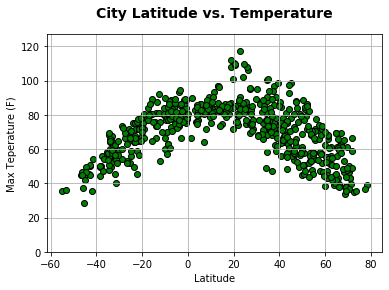

In [9]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Temperature (F)']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Temperature (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Max Teperature (F)")
plt.ylim(0,max(raw_data_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatTemp.png")
plt.show()


## Latitude vs. Humidity Plot

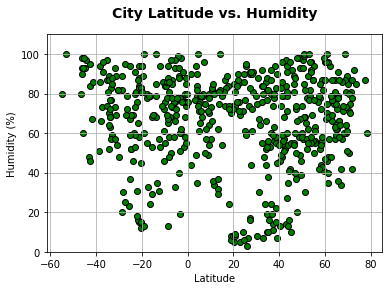

In [10]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Humidity']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Humidity (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,max(raw_data_df["Humidity"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

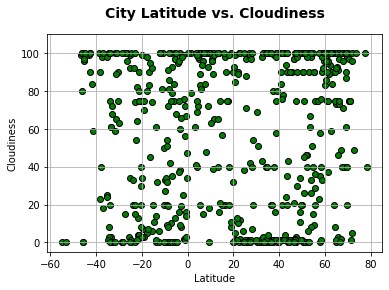

In [11]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Cloudiness']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-5,max(raw_data_df["Cloudiness"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

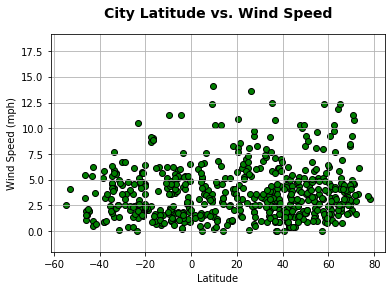

In [12]:
x_axes = raw_data_df['Lat']
y_axes = raw_data_df['Wind Speed']
plt.scatter(x_axes,y_axes, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,max(raw_data_df["Wind Speed"])+5)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)
plt.grid()
plt.savefig("../WeatherPy/LatWSpeed.png")
plt.show()

## Linear Regression

In [13]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude)
northern_hemisphere_df = raw_data_df.loc[raw_data_df["Lat"]>=0,:]
northern_hemisphere_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)
0,Norman Wells,65.2820,-126.8329,286.17,62,1,5.14,CA,1623854263,55.71
3,Tretten,61.3142,10.3007,291.70,48,100,4.12,NO,1623854264,65.66
4,Grand-Santi,4.2500,-54.3833,301.20,79,69,1.73,GF,1623854265,82.76
5,Sept-Îles,50.2001,-66.3821,283.44,97,90,1.79,CA,1623854265,50.79
6,Longyearbyen,78.2186,15.6401,277.06,60,40,3.09,SJ,1623854266,39.31
...,...,...,...,...,...,...,...,...,...,...
549,Abnūb,27.2696,31.1511,308.27,16,0,9.69,EG,1623854468,95.49
550,Pangnirtung,66.1451,-65.7125,276.15,87,75,4.12,CA,1623854469,37.67
551,Rjukan,59.8789,8.5941,294.10,47,100,6.47,NO,1623854469,69.98
552,Zhigansk,66.7697,123.3711,287.29,64,0,3.09,RU,1623854470,57.72


In [14]:
#separate the plots into Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere_df =  raw_data_df.loc[raw_data_df["Lat"]<0,:]
south_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temperature (F)
1,Victoria Point,-27.5833,153.3000,292.14,95,100,0.45,AU,1623854264,66.45
2,Bluff,-46.6000,168.3333,280.26,80,99,5.48,NZ,1623854264,45.07
7,Busselton,-33.6500,115.3333,282.64,83,3,4.22,AU,1623854267,49.35
8,Fare,-16.7000,-151.0167,299.57,79,90,9.05,PF,1623854267,79.83
10,Hermanus,-34.4187,19.2345,293.04,70,8,5.38,ZA,1623854267,68.07
...,...,...,...,...,...,...,...,...,...,...
541,Mossamedes,-15.1961,12.1522,297.50,69,20,6.17,AO,1623854465,76.10
543,Villazón,-22.0866,-65.5942,280.64,31,1,4.17,BO,1623854466,45.75
548,Tevaitoa,-16.7833,-151.5000,299.67,79,83,8.90,PF,1623854468,80.01
553,Iquitos,-3.7481,-73.2472,298.17,88,75,1.54,PE,1623854470,77.31


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.7128


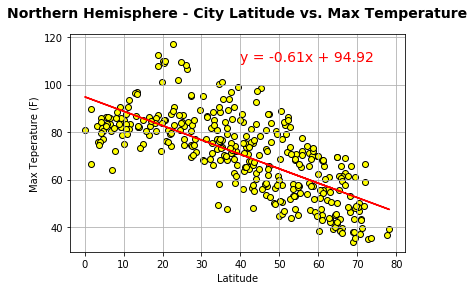

In [29]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Temperature (F)']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Max Teperature (F)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,110),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/NH_LatTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.828


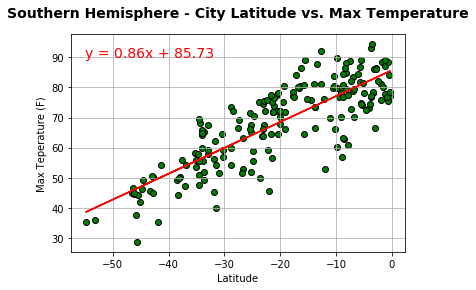

In [28]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Temperature (F)']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Max Teperature (F)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )
plt.savefig("../WeatherPy/SH_LatTemp.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.0651


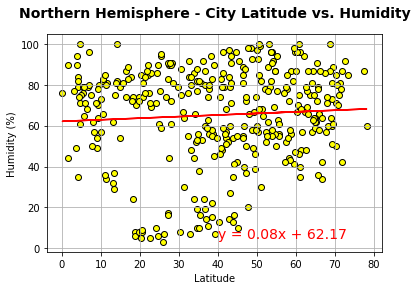

In [17]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )
plt.savefig("../WeatherPy/NH_LatHumid.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is -0.1102


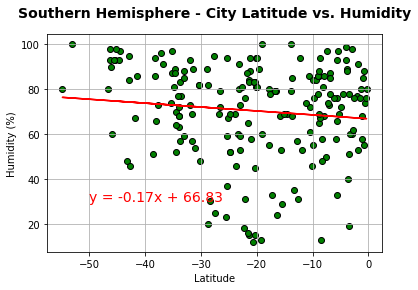

In [18]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Humidity']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )
plt.savefig("../WeatherPy/SH_LatHumid.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.0117


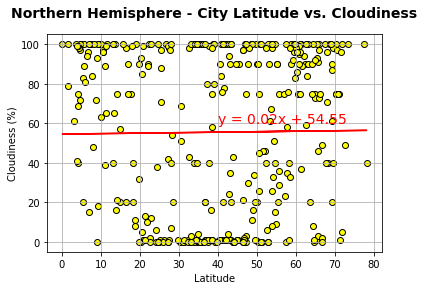

In [19]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/NH_LatCloud.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is -0.1443


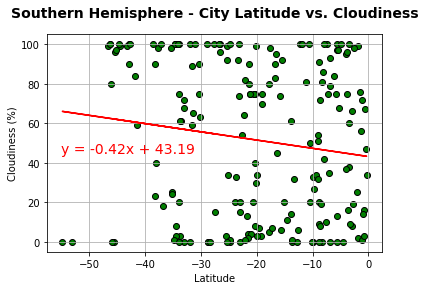

In [24]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Cloudiness']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/SH_LatCloud.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.0301


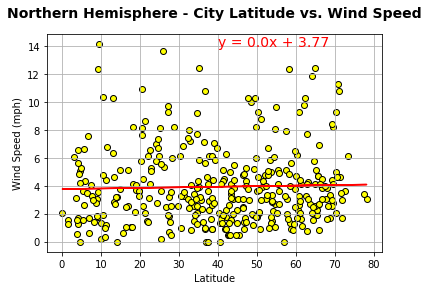

In [26]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'yellow', edgecolor = "black")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,14),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/NH_LatWSpeed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.0277


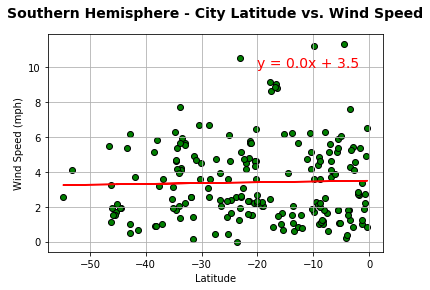

In [27]:
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Wind Speed']
plt.scatter(x_values,y_values, marker = "o",facecolors = 'green', edgecolor = "black")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (analysed on 16-06-2021)", fontsize = 14, fontweight = 'bold', y=1.05)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(0,max(northern_hemisphere_df["Temperature (F)"])+10)
#plt.xlim(32,max(capomulin_plot_sc["Tumor Volume (mm3)"])+2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=14,color="r")
plt.grid()


print(f"The correlation coefficient is {round(rvalue,4)}" )

plt.savefig("../WeatherPy/SH_LatWSpeed.png")

plt.show()